## Assignment 2 - PCA & t-SNE 

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns

In [2]:
df = pd.read_csv("train.csv")
print(df.head())
print()
print(df.info())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  

<

In [3]:
a = df.iloc[:,[2,5,6,7,9,1]]

In [4]:
imp = SimpleImputer(missing_values=np.nan,strategy='mean')
a = a.values
a[:,[0,1,2,3,4]] = imp.fit_transform(a[:,[0,1,2,3,4]])

In [5]:
X = a[:,:-1]
y = a[:,-1]

In [6]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
print(X.shape)

(891, 5)


In [7]:
# Covariance matrix
features = X.T
cov_matrix = np.cov(features)
cov_matrix[:5]

array([[ 1.0011236 , -0.33171106,  0.08317471,  0.01846339, -0.55011704],
       [-0.33171106,  1.0011236 , -0.23288596, -0.17939225,  0.09166898],
       [ 0.08317471, -0.23288596,  1.0011236 ,  0.41530381,  0.15983043],
       [ 0.01846339, -0.17939225,  0.41530381,  1.0011236 ,  0.21646789],
       [-0.55011704,  0.09166898,  0.15983043,  0.21646789,  1.0011236 ]])

In [8]:
#Eigendecomposition -> eigenvectors and eigenvalues
values, vectors = np.linalg.eig(cov_matrix)
values[:5]

array([1.69215967, 1.6317367 , 0.37559023, 0.72538279, 0.58074859])

In [9]:
vectors[:5]

array([[-0.68029285,  0.05454005,  0.70561635, -0.1866112 , -0.03884398],
       [ 0.45274522,  0.32001975,  0.20330447, -0.80361872,  0.07398229],
       [-0.12605198, -0.61235522, -0.10730012, -0.27551982,  0.72229322],
       [-0.03563436, -0.6193362 , -0.11951568, -0.36013835, -0.68641769],
       [ 0.56130607, -0.36885838,  0.65952676,  0.33728685,  0.01187593]])

In [10]:
explained_variances = []
for i in range(len(values)):
    explained_variances.append(values[i]/np.sum(values))
    
print(np.sum(explained_variances),'\n',explained_variances)

0.9999999999999999 
 [0.338052099880472, 0.32598106873356, 0.07503373854592882, 0.14491373420793277, 0.11601935863210641]


In [11]:
projected_1 = X.dot(vectors.T[0])
projected_2 = X.dot(vectors.T[1])
projected_3 = X.dot(vectors.T[2])

res = pd.DataFrame(projected_1,columns=['PC1'])
res['PC2'] = projected_2
res['PC3'] = projected_3
res['Y'] = y
res.head()

,PC1,PC2,PC3,Y
0,-1.150803,0.069191,0.142154,0.0
1,1.758606,-0.142885,-0.446084,1.0
2,-0.889439,0.718299,0.311055,1.0
3,1.448581,-0.081721,-0.734482,1.0
4,-0.574460,0.939013,0.453522,0.0


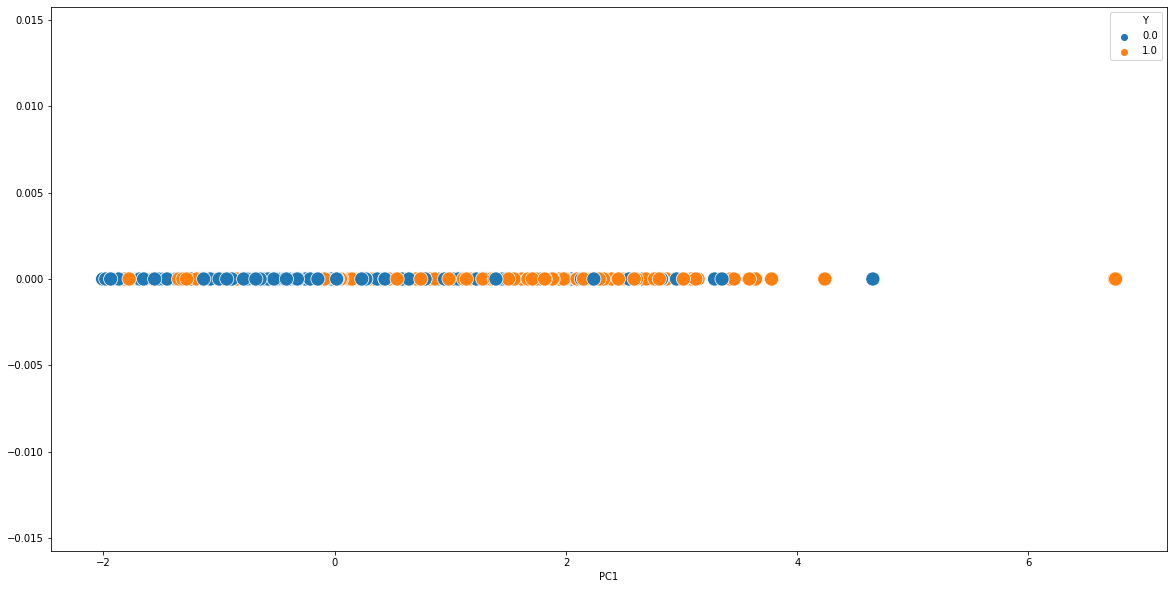

In [12]:
plt.figure(figsize=(20,10))
sns.scatterplot(res['PC1'],[0]*len(res),hue=res['Y'],s=200)

In [13]:
print(X.shape)

(891, 5)


Working with Perplexity = 10
Working with Perplexity = 30


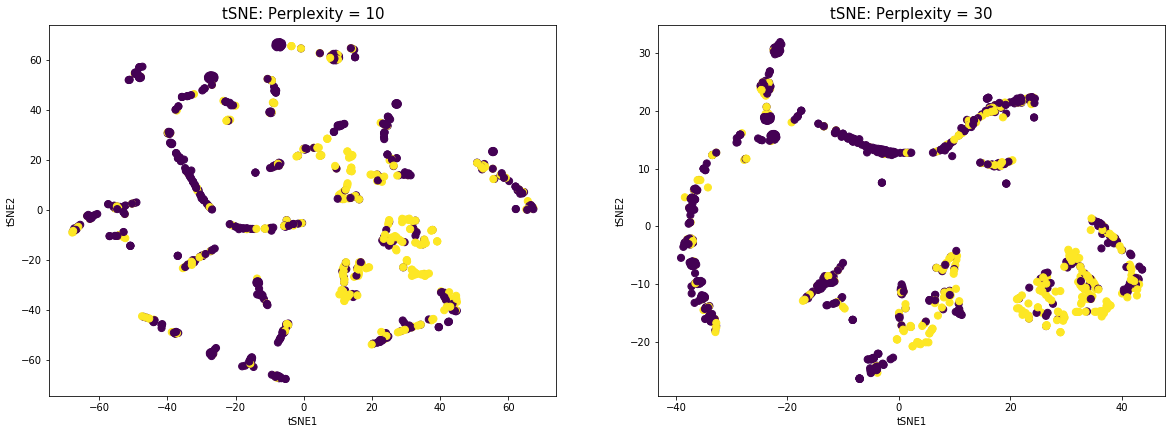

In [14]:
plt.figure(figsize = (20,15))
for index, perp in enumerate([10, 30]):
    print('Working with Perplexity = {}'.format(perp))
    model = TSNE(learning_rate = 200, n_components = 2, perplexity = perp)
    
    tsne = model.fit_transform(X)
    
    plt.subplot(221 + index)
    plt.scatter(tsne[:, 0], tsne[:, 1], c = y, s = 50)
    plt.title('tSNE: Perplexity = {}'.format(perp), fontsize = 15)
    plt.xlabel("tSNE1", fontsize = 10); plt.ylabel("tSNE2", fontsize = 10)